In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

In [14]:
train_dir = "Dog Breed/train"
val_dir = "Dog Breed/valid"

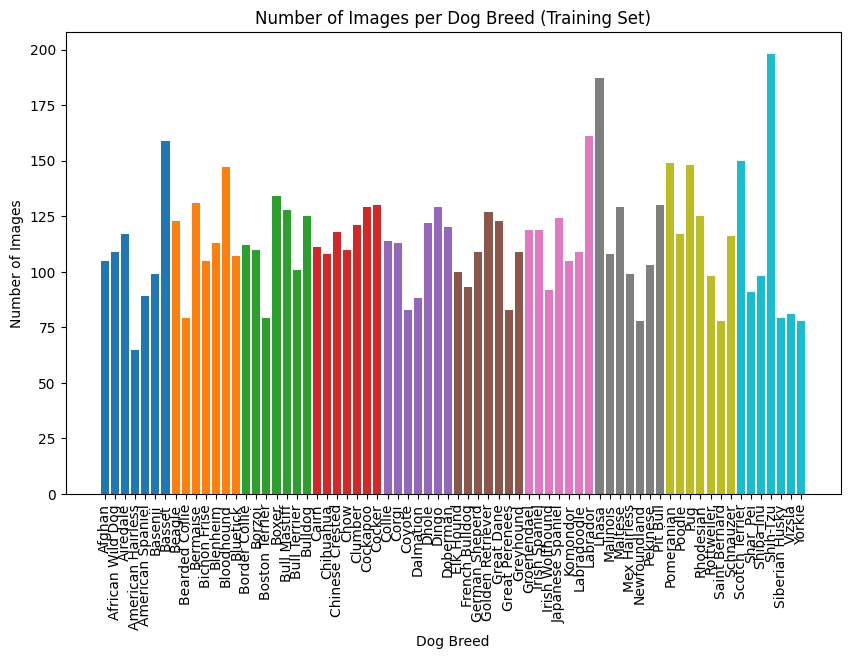

In [15]:
def count_images(directory):
    classes = os.listdir(directory)
    num_images = []
    class_names = []

    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        num_images.append(len(os.listdir(class_dir)))
        class_names.append(class_name)

    return class_names, num_images

train_class_names, train_num_images = count_images(train_dir)

colors = plt.cm.tab10(np.linspace(0, 1, len(train_class_names)))

plt.figure(figsize=(10, 6))
plt.bar(train_class_names, train_num_images, color=colors)
plt.xlabel('Dog Breed')
plt.ylabel('Number of Images')
plt.title('Number of Images per Dog Breed (Training Set)')
plt.xticks(rotation=90)
plt.show()


In [16]:
width = 224
height = 224
batch_size = 32
classes = 70
epochs = 20

In [ ]:
import os
import shutil

train_dir = "Dog Breed/train"
output_dir = "Dog Breed/train_equal_distribution"

def count_images(directory):
    classes = os.listdir(directory)
    num_images = []
    class_names = []

    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        num_images.append(len(os.listdir(class_dir)))
        class_names.append(class_name)

    return class_names, num_images

train_class_names, train_num_images = count_images(train_dir)


min_num_images = min(train_num_images)


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for class_name in train_class_names:
    class_dir = os.path.join(train_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)
    os.makedirs(output_class_dir, exist_ok=True)
    images = os.listdir(class_dir)[:min_num_images]
    for image in images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(output_class_dir, image)
        shutil.copyfile(src, dst)

print("Equal distribution per class achieved and saved in:", output_dir)


In [ ]:
train_dir_equal = "Dog Breed/train_equal_distribution"

def count_images(directory):
    classes = os.listdir(directory)
    num_images = []
    class_names = []

    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        num_images.append(len(os.listdir(class_dir)))
        class_names.append(class_name)

    return class_names, num_images

train_class_names, train_num_images = count_images(train_dir_equal)

colors = plt.cm.tab10(np.linspace(0, 1, len(train_class_names)))

plt.figure(figsize=(10, 6))
plt.bar(train_class_names, train_num_images, color=colors)
plt.xlabel('Dog Breed')
plt.ylabel('Number of Images')
plt.title('Number of Images per Dog Breed (Training Set)')
plt.xticks(rotation=90)
plt.show()

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(width, height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                  target_size=(width, height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 32)      

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epochs,
            validation_data=val_generator,
            validation_steps=val_generator.samples // batch_size)

Epoch 1/20
248/248 [==============================] - 709s 3s/step - loss: 4.1512 - accuracy: 0.0345 - val_loss: 3.9139 - val_accuracy: 0.0595
Epoch 2/20
248/248 [==============================] - 752s 3s/step - loss: 3.7139 - accuracy: 0.0992 - val_loss: 3.5378 - val_accuracy: 0.1265
Epoch 3/20
248/248 [==============================] - 749s 3s/step - loss: 3.4372 - accuracy: 0.1502 - val_loss: 3.1979 - val_accuracy: 0.2083
Epoch 4/20
248/248 [==============================] - 746s 3s/step - loss: 3.1657 - accuracy: 0.1996 - val_loss: 2.9401 - val_accuracy: 0.2619
Epoch 5/20
248/248 [==============================] - 747s 3s/step - loss: 2.9401 - accuracy: 0.2508 - val_loss: 2.8067 - val_accuracy: 0.2932
Epoch 6/20
248/248 [==============================] - 742s 3s/step - loss: 2.7223 - accuracy: 0.2967 - val_loss: 2.7468 - val_accuracy: 0.3140
Epoch 7/20
248/248 [==============================] - 744s 3s/step - loss: 2.5685 - accuracy: 0.3323 - val_loss: 2.6285 - val_accuracy: 0.3393

In [19]:
model.save("Trained Models/dog_breed_classification_raw.h5")

1/1 [==============================] - 0s 245ms/step
Predicted Label: Pomeranian
Confidence: 0.38907894


Text(0.5, 1.0, 'Dog Breed Classification\n\n Predicted Class: Pomeranian\nConfidence: 0.38907894492149353\nTrue Class: Chihuahua')

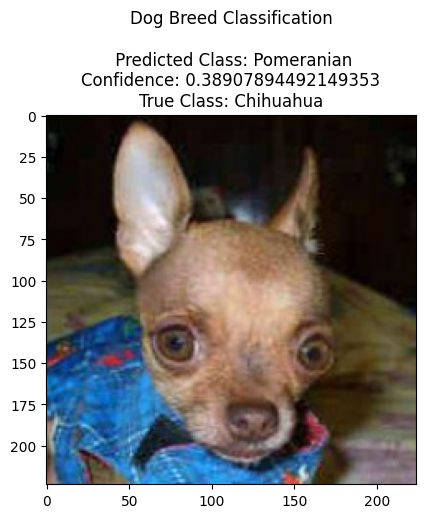

In [23]:
from keras.models import load_model
from keras.utils import load_img, img_to_array

loaded_model = load_model("Trained Models/dog_breed_classification_raw.h5")


image_path = "Dog Breed/test/Chihuahua/08.jpg"


img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0 


prediction = loaded_model.predict(img_array)



# dict for labels
labels = {
    0 : 'Afghan',
    1 : 'African Wild Dog',
    2 : 'Airedale',
    3 : 'American Hairless',
    4 : 'American Spaniel',
    5 : 'Basenji',
    6 : 'Basset',
    7 : 'Beagle',
    8 : 'Bearded Collie',
    9 : 'Bermaise',
    10 : 'Bichon Frise',
    11 : 'Blenheim',
    12 : 'Bloodhound',
    13 : 'Bluetick',
    14 : 'Border Collie',
    15 : 'Borzoi',
    16 : 'Boston Terrier',
    17 : 'Boxer',
    18 : 'Bull Mastiff',
    19 : 'Bull Terrier',
    20 : 'Bulldog',
    21 : 'Cairn',
    22 : 'Chihuahua',
    23 : 'Chinese Crested',
    24 : 'Chow',
    25 : 'Clumber',
    26 : 'Cockapoo',
    27 : 'Cocker',
    28 : 'Collie',
    29 : 'Corgi',
    30 : 'Coyote',
    31 : 'Dalmation',
    32 : 'Dhole',
    33 : 'Dingo',
    34 : 'Doberman',
    35 : 'Elk Hound',
    36 : 'French Bulldog',
    37 : 'German Sheperd',
    38 : 'Golden Retriever',
    39 : 'Great Dane',
    40 : 'Great Perenees',
    41 : 'Greyhound',
    42 : 'Groenendael',
    43 : 'Irish Spaniel',
    44 : 'Irish Wolfhound',
    45 : 'Japanese Spaniel',
    46 : 'Komondor',
    47 : 'Labradoodle',
    48 : 'Labrador',
    49 : 'Lhasa',
    50 : 'Malinois',
    51 : 'Maltese',
    52 : 'Mex Hairless',
    53 : 'Newfoundland',
    54 : 'Pekinese',
    55 : 'Pit Bull',
    56 : 'Pomeranian',
    57 : 'Poodle',
    58 : 'Pug',
    59 : 'Rhodesian',
    60 : 'Rottweiler',
    61 : 'Saint Bernard',
    62 : 'Schnauzer',
    63 : 'Scotch Terrier',
    64 : 'Shar_Pei',
    65 : 'Shiba Inu',
    66 : 'Shih-Tzu',
    67 : 'Siberian Husky',
    68 : 'Vizsla',
    69 : 'Yorkie'
}

predicted_class = np.argmax(prediction)
confidence = prediction[0][predicted_class]

predicted_label = labels.get(predicted_class)

print("Predicted Label:", predicted_label)
print("Confidence:", confidence)

plt.imshow(plt.imread(image_path), cmap='gray')
plt.title(f"Dog Breed Classification\n\n Predicted Class: {predicted_label}\nConfidence: {confidence}\nTrue Class: {os.path.basename(os.path.dirname(image_path))}")
